<a href="https://colab.research.google.com/github/3mgai22rm72yn3/Regress-o-Linear-M-ltipla/blob/main/projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Importando os pacotes necessários:

$$
   f(x,y) = \sin(x+y)
$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Importando os dados:

In [ ]:
dados=pd.read_csv("casesBrazil.csv")
dados.head


<bound method NDFrame.head of      day    cases
0      1        1
1      2        1
2      3        1
3      4        2
4      5        2
..   ...      ...
129  130  1546935
130  131  1580502
131  132  1605694
132  133  1630061
133  134  1675264

[134 rows x 2 columns]>

- Plotando o gráfico.

Text(0.5, 1.0, 'Casos COVID-19')

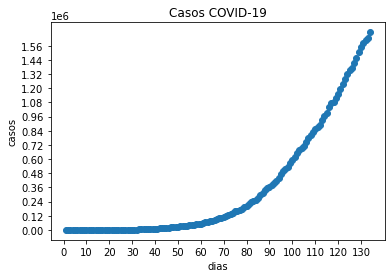

In [ ]:
plt.scatter(dados["day"],dados["cases"])
plt.xticks(np.arange(0,140,step=10))
plt.yticks(np.arange(0,1680000,step=120000))
plt.xlabel("dias")
plt.ylabel("casos")
plt.title("Casos COVID-19")

- Definindo as funções: Custo e Gradiente Descendente.

In [ ]:
# Criando a funcao de Custo
def Cost(X,y,theta):
    m = len(y)
    h = X.dot(theta) # .dot => produto matricial
    J = (1/(2*m))*(np.sum((h-y)**2))
    return J

# Criando a funcao dos Gradientes Descendentes
def GradDesce(X,y,theta,alpha,nbr_iter):
    J_history = []
    m = len(y)
    for i in range(nbr_iter):
        h = X.dot(theta)
        theta = theta - (alpha/m)*(X.T.dot(h-y))
        J_history.append(Cost(X,y,theta))
    return theta,J_history

- Obtendo os dados de entrada e realizando pre processamento

In [ ]:
# Normalizando

y_norm=dados["cases"]
X_norm=dados["day"]
y_norm=(y_norm-min(y_norm))/(max(y_norm)-min(y_norm))
X_norm=(X_norm-min(X_norm))/(max(X_norm)-min(X_norm))
y_norm
X_norm

X,y = X_norm.values, y_norm.values
m = len(y)
X = np.append(np.ones([m,1]),X.reshape(m,1),axis=1)
y = y.reshape(m,1)
theta = np.zeros([2,1])

- Calculando o custo com vetor theta inicial

In [ ]:
initial_cost = Cost(X,y,theta)
print(initial_cost)

0.06479363507403196


- Atualizando o vetor theta em relacao a funcao h

In [ ]:
nbr_iter = 1500
alpha = 0.01
new_theta,J_history = GradDesce(X,y,theta,alpha,nbr_iter)
print(new_theta)

[[-0.06610832]
 [ 0.5837187 ]]


- Novo custo apos a atualizacao do theta

In [ ]:
new_cost = Cost(X,y,new_theta)
print(new_cost)

# Note que o custo está diminuindo, isso implica que a taxa de aprendizado (alpha) é adequada.

NameError: ignored

- Comparando graficamente os dados com a funcao h encontrada


Text(0.5, 1.0, 'Dados de Treinamento Ajustados por Regressão Linear')

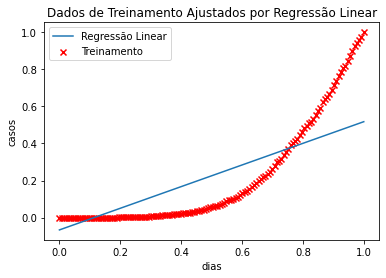

In [ ]:
plt.scatter(X[:,1],y,c='red',marker='x',label='Treinamento')
plt.plot(X[:,1],np.dot(X,new_theta),label='Regressão Linear')
plt.ylabel('casos')
plt.xlabel('dias')
plt.legend()
plt.title('Dados de Treinamento Ajustados por Regressão Linear')

- Plotando o grafico de iteracoes x valor da funcao custo

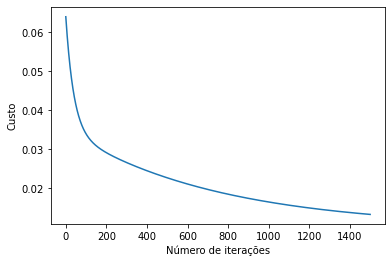

In [ ]:
plt.plot(range(len(J_history)),J_history)
plt.xlabel('Número de iterações')
plt.ylabel('Custo')
plt.show()

# De fato o custo (J) está diminuindo

- Testando o modelo

In [ ]:
def prediction(X,new_theta):
    pred = np.dot(X,new_theta)
    return pred

p=138
predict1 = prediction(np.array([1,p]),new_theta)
print("Para o dia p, o modelo prevê uma quantia de casos de " + str(round(predict1[0],0)))

Para o dia p, o modelo prevê uma quantia de casos de 80.0


### 1) Aplicando polinomios de grau n=3,5,10.

#### Descreveno h como polinomio de grau 3
    - Função Custo:

In [ ]:
Z=np.append(X, (X[:,1]**2).reshape(m,1),axis=1)
Z=np.append(Z,(X[:,1]**3).reshape(m,1),axis=1)

theta = np.zeros([4,1]) # depende do formato da funcao h!!

initial_cost = Cost(Z,y,theta)
print(initial_cost)

0.06479363507403196


- Função Gradiente Descente:
      - Número de interações: 1500;
      - Taxa de aprendizado: 0.01.

In [ ]:
nbr_iter = 1500
alpha = 0.01
new_theta,J_history = GradDesce(Z,y,theta,alpha,nbr_iter)
print(new_theta)

new_cost = Cost(Z,y,new_theta)
print(new_cost)

# Note que a matriz new_theta possui os coeficientes do polinomio de grau 3.

[[-0.08822577]
 [ 0.21020125]
 [ 0.32639091]
 [ 0.36765353]]
0.002885377502317249


- Plotando o grafico de iteracoes x valor da funcao custo.


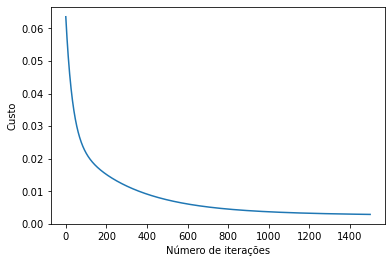

In [ ]:
plt.plot(range(len(J_history)),J_history)
plt.xlabel('Número de iterações')
plt.ylabel('Custo')
plt.show()

# De fato, a taxa de aprendizado é adaquada, pois verificamos que o custo está diminuindo.

- Comparando graficamente os dados com a funcao h encontrada.


Text(0.5, 1.0, 'Dados de Treinamento Ajustados por Regressão Linear')

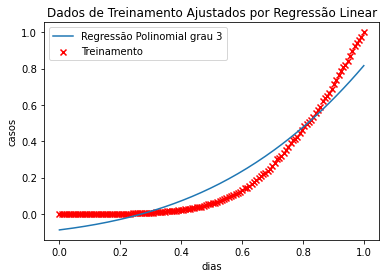

In [ ]:
plt.scatter(X[:,1],y,c='red',marker='x',label='Treinamento')
plt.plot(X[:,1],np.dot(Z,new_theta),label='Regressão Polinomial grau 3')
plt.ylabel('casos')
plt.xlabel('dias')
plt.legend()
plt.title('Dados de Treinamento Ajustados por Regressão Linear')

#### descrevendo h como polinomio de grau 5

- Função Custo

In [ ]:
Z=np.append(X, (X[:,1]**2).reshape(m,1),axis=1)
Z=np.append(Z,(X[:,1]**3).reshape(m,1),axis=1)
Z=np.append(Z,(X[:,1]**4).reshape(m,1),axis=1)
Z=np.append(Z,(X[:,1]**5).reshape(m,1),axis=1)

theta = np.zeros([6,1]) # depende do formato da funcao h!!

initial_cost = Cost(Z,y,theta)
print(initial_cost)


0.06479363507403196


- Função Gradiente Descendente

In [ ]:
nbr_iter = 1500
alpha = 0.01
new_theta,J_history = GradDesce(Z,y,theta,alpha,nbr_iter)
print(new_theta)

new_cost = Cost(Z,y,new_theta)
print(new_cost)


[[-0.08822577]
 [ 0.21020125]
 [ 0.32639091]
 [ 0.36765353]]
0.002885377502317249


- Plotando o grafico de iteracoes x valor da funcao custo.

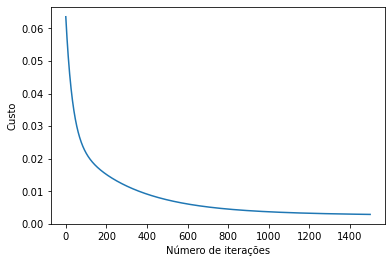

In [ ]:
plt.plot(range(len(J_history)),J_history)
plt.xlabel('Número de iterações')
plt.ylabel('Custo')
plt.show()

- Comparando graficamente os dados com a funcao h encontrada.


Text(0.5, 1.0, 'Dados de Treinamento Ajustados por Regressão Linear')

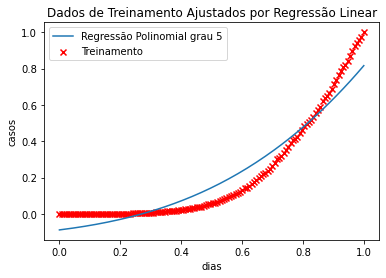

In [ ]:
plt.scatter(X[:,1],y,c='red',marker='x',label='Treinamento')
plt.plot(X[:,1],np.dot(Z,new_theta),label='Regressão Polinomial grau 5')
plt.ylabel('casos')
plt.xlabel('dias')
plt.legend()
plt.title('Dados de Treinamento Ajustados por Regressão Linear')

- Descreveno h como polinomio de grau 10
     - Usando for;
     - FUnção Custo.

In [ ]:
for i in range(6,11):
    Z=np.append(Z,(X[:,1]**i).reshape(m,1),axis=1)

theta = np.zeros([11,1]) # depende do formato da funcao h!!

initial_cost = Cost(Z,y,theta)
print(initial_cost)

ValueError: shapes (134,9) and (11,1) not aligned: 9 (dim 1) != 11 (dim 0)

- Função Gradiente Descendente

In [ ]:
nbr_iter = 1500
alpha = 0.01
new_theta,J_history = GradDesce(Z,y,theta,alpha,nbr_iter)
print(new_theta)

new_cost = Cost(Z,y,new_theta)
print(new_cost)

[[-0.03267353]
 [ 0.11132729]
 [ 0.14757883]
 [ 0.14969907]
 [ 0.14048411]
 [ 0.12797841]
 [ 0.11520589]
 [ 0.10328633]
 [ 0.09257255]
 [ 0.08310317]
 [ 0.07479312]]
0.0005385054805951272


- Plotando o grafico de iteracoes x valor da funcao custo.


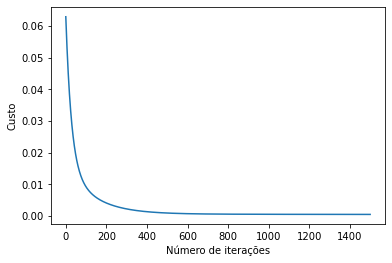

In [ ]:
plt.plot(range(len(J_history)),J_history)
plt.xlabel('Número de iterações')
plt.ylabel('Custo')
plt.show()


- Comparando graficamente os dados com a funcao h encontrada.

Text(0.5, 1.0, 'Dados de Treinamento Ajustados por Regressão Linear')

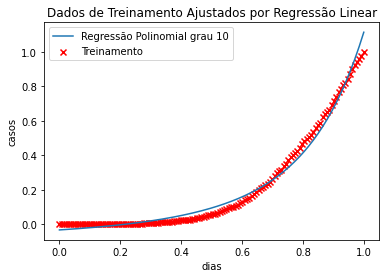

In [ ]:
plt.scatter(X[:,1],y,c='red',marker='x',label='Treinamento')
plt.plot(X[:,1],np.dot(Z,new_theta),label='Regressão Polinomial grau 10')
plt.ylabel('casos')
plt.xlabel('dias')
plt.legend()
plt.title('Dados de Treinamento Ajustados por Regressão Linear')

#### 2) Realizando a regressao com h sendo exponencial

- Função Custo


In [ ]:
theta = np.zeros([2,1]) # depende do formato da funcao h!!

# adicionando um variavel de folga para deslocar os valores nulos de y
y_des=y+0.001
X_des=X+0.001

ln_y=np.log(y_des)

initial_cost = Cost(X_des,ln_y,theta)
print(initial_cost)

8.184968953902773


- Função Gradiente Descendente

In [ ]:
nbr_iter = 5000
alpha = 0.05
new_theta,J_history = GradDesce(X_des,ln_y,theta,alpha,nbr_iter)
print(new_theta)

new_cost = Cost(X_des,ln_y,new_theta)
print(new_cost)


[[-7.33140037]
 [ 8.14271242]]
0.06946854461327721


- Plotando o grafico de iteracoes x valor da funcao custo.


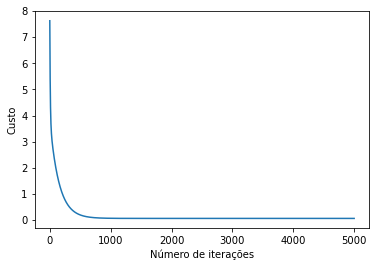

In [ ]:
plt.plot(range(len(J_history)),J_history)
plt.xlabel('Número de iterações')
plt.ylabel('Custo')
plt.show()

In [ ]:
new_theta[0]=np.exp(new_theta[0])

new_theta

array([[1.00065487],
       [8.14271242]])

- Comparando graficamente os dados com a funcao h encontrada.


Text(0.5, 1.0, 'Regressão para exponencial alpha=0.3')

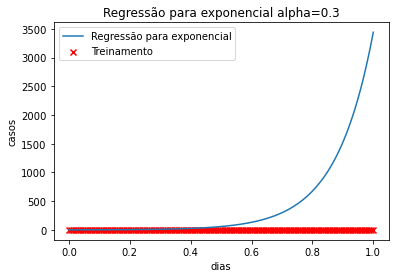

In [ ]:
plt.scatter(X[:,1],y,c='red',marker='x',label='Treinamento')
plt.plot(X[:,1],new_theta[0]*(np.exp(new_theta[1]*X[:,1])),label='Regressão para exponencial')
plt.ylabel('casos')
plt.xlabel('dias')
plt.legend()
plt.title('Regressão para exponencial alpha=0.3')

#### 3) diferentes decaimentos de custo em funcao de alpha


<ipython-input-140-b8733955e5b4>:5: RuntimeWarning: overflow encountered in square
  J = (1/(2*m))*(np.sum((h-y)**2))
<ipython-input-140-b8733955e5b4>:14: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha/m)*(X.T.dot(h-y))


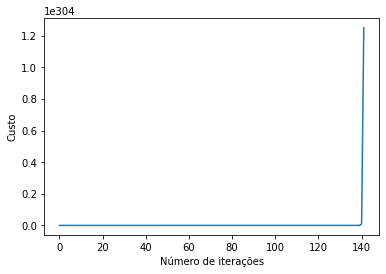

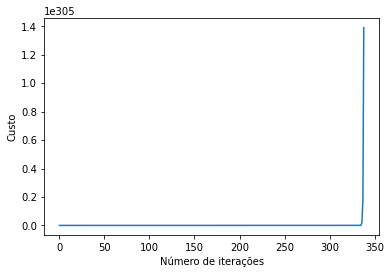

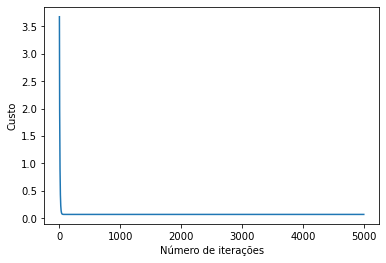

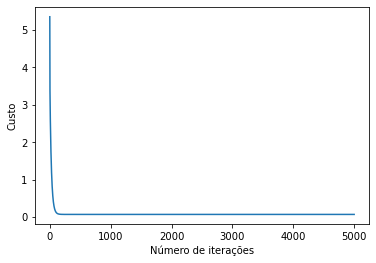

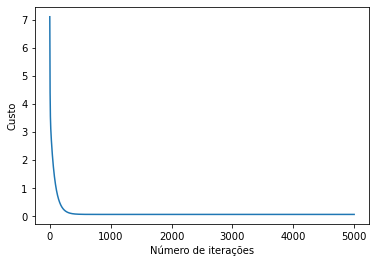

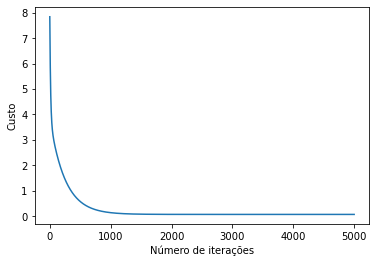

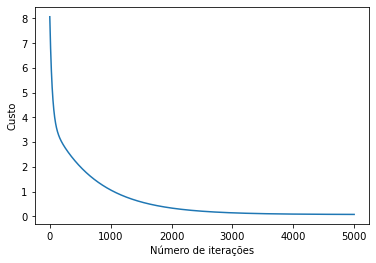

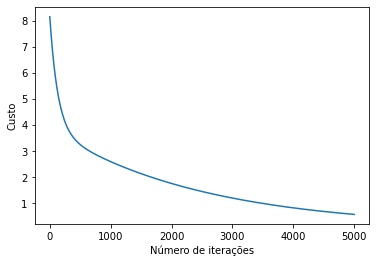

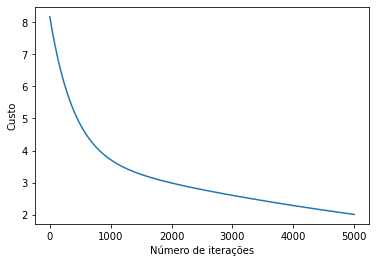

In [ ]:
alphas=[10,3,1,0.3,0.1,0.03,0.01,0.003,0.001]
nbr_iter = 5000
for i in alphas:
    theta = np.zeros([2,1])
    alpha = i
    new_theta,J_history = GradDesce(X_des,ln_y,theta,alpha,nbr_iter)
    # Plotando o grafico de iteracoes x valor da funcao custo.
    plt.plot(range(len(J_history)),J_history)
    plt.xlabel('Número de iterações')
    plt.ylabel('Custo')
    plt.show()

#### 4) Usando equacoes normais


In [ ]:
theta = np.zeros([2,1]) # depende do formato da funcao h!!

y_des=y+0.001
X_des=X+0.001

ln_y=np.log(y_des)

initial_cost = Cost(X_des,ln_y,theta)
print(initial_cost)

8.184968953902773


- Criando a Função que calcula o QM por equações normais

In [ ]:
# Criando funcao que calcula QM por Equacoes Normais
def EqNorm(X,y):
    theta = []
    A=np.dot(np.transpose(X),X)
    y_bar=np.dot(np.transpose(X),y)
    theta=np.linalg.solve(A,y_bar)
    return theta

Theta_eqnorm=EqNorm(X_des,ln_y)
Theta_eqnorm[0]=np.exp(Theta_eqnorm[0])

- Comparando graficamente os dados com a funcao h encontrada.


Text(0.5, 1.0, 'Regressão para exponencial por Eq Normais')

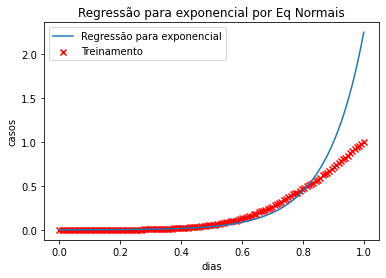

In [ ]:
plt.scatter(X[:,1],y,c='red',marker='x',label='Treinamento')
plt.plot(X[:,1],Theta_eqnorm[0]*(np.exp(Theta_eqnorm[1]*X[:,1])),label='Regressão para exponencial')
plt.ylabel('casos')
plt.xlabel('dias')
plt.legend()
plt.title('Regressão para exponencial por Eq Normais')